# Как использовать эти знания на практике?

- Построить модель
- вычислить метрику качества
- выполнить преобразования
- если метрика качества выросла, то найденную трансформацию применять ко входным данным перед тем, как подать на вход модели

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler    #z-score
from sklearn.preprocessing import MinMaxScaler  #0-1  min  max

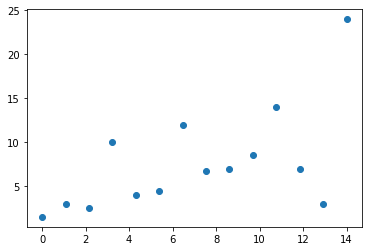

In [41]:
x = np.linspace(0, 14, num=14).reshape(-1, 1)   #делаем обязательно reshape для векторного вида превращаем в столбец-матрицу
y = np.array([1.5, 3, 2.5,10, 4, 4.5, 12, 6.7, 7, 8.5, 14, 7,3, 24])

plt.scatter(x, y)
plt.show()

In [42]:
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

r2_score(y, y_pred)

0.3512854555657736

Логарифмируем наши точки и посмотри теперь на влияние выбросов

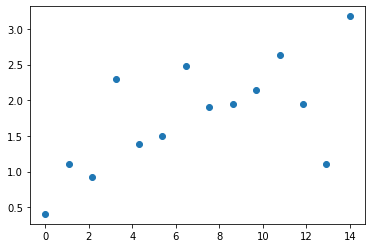

In [43]:
y_transformed = np.log(y)

plt.scatter(x, y_transformed)
plt.show()

In [44]:
reg = LinearRegression().fit(x, y_transformed)

y_pred = reg.predict(x)

r2_score(y_transformed, y_pred)

0.4011866521213011

Метрика стала лучше!!
Еще есть извлечение квадратного корня!!!

Z-SCORE

In [45]:
transformed_data = StandardScaler().fit_transform(y.reshape(-1,1)).reshape(-1)
transformed_data


array([-1.07412845, -0.81395893, -0.90068211,  0.4001655 , -0.64051258,
       -0.55378941,  0.7470582 , -0.17220745, -0.12017354,  0.13999598,
        1.09395089, -0.12017354, -0.81395893,  2.82841437])

MIN-MAX scaler / normalization

In [47]:
raw_data = np.array([
    1.,  3.,  2.,  4.,  2., 10.,  2.,  5.,  2.,  2.,  1.,  7.,  5.,  2.,  5., 16., 10.,  3.,24.],
    dtype=np.float32
)

transformed_data_mm = MinMaxScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1) #reshape(-1, 1) --если однафича и несколько объектов столбец вектор
transformed_data_mm

array([0.        , 0.08695652, 0.04347826, 0.13043478, 0.04347826,
       0.39130437, 0.04347826, 0.17391305, 0.04347826, 0.04347826,
       0.        , 0.2608696 , 0.17391305, 0.04347826, 0.17391305,
       0.65217394, 0.39130437, 0.08695652, 1.        ], dtype=float32)